In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Training dataset/classification_train.csv')
X=((data.iloc[0:24000,1:785].values).T)/255
Y=data.iloc[:,0].values
X_t=((data.iloc[24000:30000,1:785].values).T)/255
Y2=data.iloc[0:24000,0].values
# one hot encoding

Y1=np.zeros((30000,10))
for j in range(10):
  for i in range(30000):
    if (Y[i]==j):
      Y1[i,j]=1
#now, Y1 is the target values for n neural network

#splitting the target values
y=(Y1[0:24000,:]).T
y_t=(Y1[24000:30000,:]).T

label=(data.iloc[24000:30000,0].values).reshape(6000,1)

In [ ]:
def parameters_initialization(dimensions):    
  parameters={}
  N=len(dimensions)   #N is the number of layers
  for i in range(1, N):
        parameters['W' + str(i)] = np.random.randn(dimensions[i], dimensions[i-1])*0.01
        parameters['b' + str(i)] = np.zeros((dimensions[i], 1))

  return parameters

In [ ]:
def softmax(z):
    expZ = np.exp(z)
    return expZ/(np.sum(expZ,axis=0))
def relu(Z):
    A = np.maximum(0,Z)
    return A
def tanh(x):
    return np.tanh(x)
def forward_prop(X, parameters, activation):
  forward_func = {}
  N = len(parameters) // 2   

  forward_func['A0']=X

  for i in range(1,N):
    forward_func['Z'+str(i)] = np.matmul(parameters['W'+str(i)],forward_func['A'+str(i-1)]) + parameters['b'+str(i)]

    if activation == 'tanh':
        forward_func['A' + str(i)] = tanh(forward_func['Z' + str(i)])
    else:
        forward_func['A' + str(i)] = relu(forward_func['Z' + str(i)])

  forward_func['Z'+str(N)] = np.matmul(parameters['W'+str(N)],forward_func['A'+str(N-1)]) + parameters['b'+str(N)]
  forward_func['A'+str(N)] = softmax(forward_func['Z'+str(N)])

  return forward_func['A' + str(N)], forward_func

In [ ]:
def cost(AN,Y):
  m=y.shape[1]
  cost = -(1/m)* np.sum(Y * np.log(AN))
  cost=np.squeeze(cost)
  return cost

In [ ]:
def d_relu(x):
    return np.array(x > 0, dtype = 'float')
def d_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def back_propagation(AN,y,parameters,forward_func,activation):
  gradient={}
  N = len(parameters) // 2                  
  m = AN.shape[1]

  gradient["dZ" + str(N)] = AN - y
  gradient["dW" + str(N)] =  (1/m)*np.matmul(gradient["dZ" + str(N)],forward_func['A' + str(N-1)].T)
  gradient["db" + str(N)] =  (1/m)*np.sum(gradient["dZ" + str(N)], axis = 1, keepdims = True)
    
  for i in reversed(range(1, N)):
      if activation == 'tanh':
            gradient["dZ" + str(i)] = np.matmul(parameters['W' + str(i+1)].T,gradient["dZ" + str(i+1)])*d_tanh(forward_func['A' + str(i)])
      else:
            gradient["dZ" + str(i)] = np.matmul(parameters['W' + str(i+1)].T,gradient["dZ" + str(i+1)])*d_relu(forward_func['A' + str(i)])
            
      gradient["dW" + str(i)] =  (1/m)*np.matmul(gradient["dZ" + str(i)],forward_func['A' + str(i-1)].T)
      gradient["db" + str(i)] =  (1/m)*np.sum(gradient["dZ" + str(i)], axis = 1, keepdims = True)

      
      parameters["W" + str(i+1)] = parameters["W" + str(i+1)] - alpha * gradient["dW" + str(i+1)]
      parameters["b" + str(i+1)] = parameters["b" + str(i+1)] - alpha * gradient["db" + str(i+1)]

  return parameters

In [ ]:
cost_store = []  
def model(X, Y, dimensions, alpha, activation , num):
    np.random.seed(1)
    parameters = parameters_initialization(dimensions)

    for i in range(0, num):
        AN, forward_func = forward_prop(X, parameters, activation)
        cost_cal = cost(AN, Y)
        cost_store.append(cost_cal)
        parameters = back_propagation(AN, Y, parameters, forward_func, activation)
        
        if (i % 25 == 0):
          print("iteration: ",i,"   cost: ",cost_cal)
        
    return parameters

In [ ]:
iterations=1001
alpha=0.2
activation='tanh'
dimensions = [X.shape[0],784,196,49,y.shape[0]] 
parameters = model(X, y, dimensions, alpha, activation , iterations)

iteration:  0    cost:  2.302562238279054
iteration:  25    cost:  2.3021794117758123
iteration:  50    cost:  2.3016326883842324
iteration:  75    cost:  2.3005702858166712
iteration:  100    cost:  2.297796216175509
iteration:  125    cost:  2.286790454996284
iteration:  150    cost:  2.2061868400666578
iteration:  175    cost:  1.8222114220743377
iteration:  200    cost:  1.6701207751397804
iteration:  225    cost:  1.5012144877475726
iteration:  250    cost:  1.3156215783524854
iteration:  275    cost:  1.1932128143080711
iteration:  300    cost:  1.1111265905166423
iteration:  325    cost:  1.0534397743595416
iteration:  350    cost:  1.0102979391334828
iteration:  375    cost:  0.9761955062176289
iteration:  400    cost:  0.9484442043094339
iteration:  425    cost:  0.9254606770282923
iteration:  450    cost:  0.9059659403773368
iteration:  475    cost:  0.8888214438572208
iteration:  500    cost:  0.873033101941333


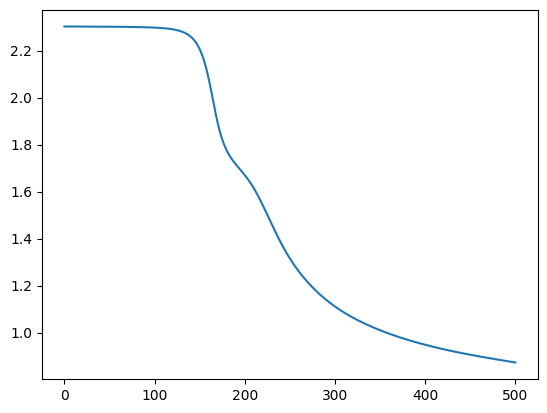

In [ ]:
t = np.arange(0, iterations)
plt.plot(t,cost_store)
plt.show()

In [ ]:
forward_func_t = {}
N = len(parameters) // 2   

forward_func_t['A0']=X_t

for i in range(1,N):
    forward_func_t['Z'+str(i)] = np.matmul(parameters['W'+str(i)],forward_func_t['A'+str(i-1)]) + parameters['b'+str(i)]

    if activation == 'tanh':
        forward_func_t['A' + str(i)] = tanh(forward_func_t['Z' + str(i)])
    else:
        forward_func_t['A' + str(i)] = relu(forward_func_t['Z' + str(i)])

forward_func_t['Z'+str(N)] = np.matmul(parameters['W'+str(N)],forward_func_t['A'+str(N-1)]) + parameters['b'+str(N)]
forward_func_t['A'+str(N)] = softmax(forward_func_t['Z'+str(N)])

acc=0
a=np.random.rand(6000)
for i in range(6000):
  a[i]=np.argmax((forward_func_t['A'+str(N)])[:,i])
a=a.reshape(6000,1)
for i in range(6000):
  if(label[i]==a[i]):
    acc+=1
print(round((acc/60),3))

66.217
